### Dataset and Project Question
For our research project, we have selected datasets containing processed angiography data on patients in various clinics in 1988, applying a probability model derived from test results of 303 patients at the Cleveland Clinic in Cleveland, Ohio to generate and estimate results for the diagnosis of coronary heart disease (Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R., 1989). The datasets include the following patients undergoing angiography: 
- 303 patients at the Cleveland Clinic in Cleveland, Ohio (Original dataset for model) 
- 425 patients at the Hungarian Institute of Cardiology in Budapest, Hungary
- 200 patients at the Veterans Administration Medical Center in Long Beach, California 
- 143 patients from the University Hospitals in Zurich and Basel, Switzerland

These datasets were retrieved from the [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease) dataset from UCI machine learning repository, and converted from .data files to CSV files with Excel. The dataset obtained contains the following 14 attributes out of 76 attributes from the initial dataset for each patient: 

In [1]:
myTable <- data.frame(
  Variable = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
  Definition = c("Age", "Sex", "Chest pain type", "Resting blood pressure on admission to hospital", "Serum cholesterol", "Presence of high blood sugar", "Resting electrocardiographic results", "Maximum heart rate achieved", "Exercise induced angina", "ST depression induced by exercise relative to rest", "Slope of the peak exercise ST segment", "Number of major vessels coloured by fluoroscopy", "Presence of defect", "Diagnosis of heart disease"),
  Type = c("Continuous", "Categorical", "Categorical", "Continuous", "Continuous", "Categorical", "Categorical", "Continuous", "Categorical", "Continuous", "Categorical", "Continuous", "Categorical", "Categorical"),
  Unit = c("Years", "N/A", "N/A", "mmHg", "mg/dl", "N/A", "N/A", "BPM", "N/A", "N/A", "N/A", "N/A", "N/A", "N/A"),
  Categories = c("N/A", "0: Female; 1: Male", "1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic", "N/A", "N/A", "0: False; 1: True", "0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria", "N/A", "0: No; 1: Yes", "N/A", "1: Upsloping; 2: Flat; 3: Downsloping", "Range from 1-3", "3: Normal; 6: Fixed defect; 7: Reversable defect", "0: < 50% diameter narrowing; 1+: > 50% diameter narrowing")
)
myTable

Variable Definition                                         Type       
1  age      Age                                                Continuous 
2  sex      Sex                                                Categorical
3  cp       Chest pain type                                    Categorical
4  trestbps Resting blood pressure on admission to hospital    Continuous 
5  chol     Serum cholesterol                                  Continuous 
6  fbs      Presence of high blood sugar                       Categorical
7  restecg  Resting electrocardiographic results               Categorical
8  thalach  Maximum heart rate achieved                        Continuous 
9  exang    Exercise induced angina                            Categorical
10 oldpeak  ST depression induced by exercise relative to rest Continuous 
11 slope    Slope of the peak exercise ST segment              Categorical
12 ca       Number of major vessels coloured by fluoroscopy    Continuous 
13 thal     Presence of defect                                 Categorical
14 num      Diagnosis of heart disease                         Categorical
   Unit 
1  Years
2  N/A  
3  N/A  
4  mmHg 
5  mg/dl
6  N/A  
7  N/A  
8  BPM  
9  N/A  
10 N/A  
11 N/A  
12 N/A  
13 N/A  
14 N/A  
   Categories                                                                                                                                                                                    
1  N/A                                                                                                                                                                                           
2  0: Female; 1: Male                                                                                                                                                                            
3  1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic                                                                                                                   
4  N/A                                                                                                                                                                                           
5  N/A                                                                                                                                                                                           
6  0: False; 1: True                                                                                                                                                                             
7  0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
8  N/A                                                                                                                                                                                           
9  0: No; 1: Yes                                                                                                                                                                                 
10 N/A                                                                                                                                                                                           
11 1: Upsloping; 2: Flat; 3: Downsloping                                                                                                                                                         
12 Range from 1-3                                                                                                                                                                                
13 3: Normal; 6: Fixed defect; 7: Reversable defect                                                                                                                                              
14 0: < 50% diameter narrow

My project question is: 
#### "Given the sample data for angiography patients, is cholesterol level associated with age, and does the association differ between different locations?" 

Previous studies have indicated a positive association between cholesterol level and age, where total cholesterol levels steadily increase from age 20 to 65, followed by a slight decrease in men and a plateu in women (Beckett, N., Nunes, M., & Bulpitt, C., 2000). Another study has indicated a positive correlation between serum cholesterol and heart rate, along with a significant inverse association between heart rate and HDL-cholesterol levels (Wannamethee, G., & Shaper, A. G., 1994). A study in the US has also identified a low-order, positive relationship of dietary cholesterol intake to systolic blood pressure (Sakurai, M., Stamler, J., Miura, K., Brown, I. J., Nakagawa, H., Elliott, P., Ueshima, H., Chan, Q., Tzoulaki, I., Dyer, A. R., Okayama, A., Zhao, L., & INTERMAP Research Group, 2011). As such, gender, heart rate and blood pressure may be confounding variables for this question. However, it is unclear how the locations of each clinic influence the change in cholesterol levels with age.

There are 4 separate datasets dependent on location, and thus can be modified to contain a new variable `location` indicating their respective location. However, the `chol` column for the Switzerland dataset does not contain any valid values, and thus the Switzerland dataset may need to be excluded. A multiple linear regression model can be applied with the `location`, `age`, and `chol` variables, allowing a prediction on the difference in association between cholesterol level and age between different locations. A/B testing can also be applied to compare the effect of variation in location on the required association.

Given the project question and the limitations of the given data, the following hypothesis test is to be conducted: 
- $H_0: \text{There is no significant difference in the association of cholesterol level with age between each location}$ 
- $H_1: \text{There is a significant difference in the association of cholesterol level with age between at least 1 pair of locations}$

<!-- Given the project question, let $\beta_{5}$ be the difference in reference line slope for Hungary compared to the reference line slope for Cleveland, and let $\beta_{6}$ be the difference in slope for the reference line for California compared to the reference line slope for Cleveland. The following hypothesis tests will be conducted: 

Hypothesis test 1:
- $H_0: \beta_{5} = 0$ 
- $H_1: \beta_{5} \neq 0$

Hypothesis test 2:
- $H_0: \beta_{6} = 0$ 
- $H_1: \beta_{6} \neq 0$ -->

## 2. Preliminary Results

### 2.1. Loading relevant libraries

In [2]:
# Imports

# install.packages("infer") # Install infer package for use

library(dplyr) # Data manipulation operations
library(gridExtra) # Extensions for grid system
library(tidyverse) # Better presentation of data
library(repr) # String and binary representations of objects for several formats / mime types 
library(lubridate) # Easier date organisation
library(infer) # Bootstrap distribution, confidence interval
library(broom) # Reorganises outputs into tidy tibbles
# library(ggplot2) # Provides commands to create complex plots
library(GGally) # Provides correlation between variables
library(tidymodels) # Modelling with training and testing
library(car) # Applied regression tools, including VIF
library(leaps) # Exhaustive search for the best subsets of the variables in x for predicting y in linear regression
library(glmnet) # Regularised regression models
library(mltools) # Regression metrics
library(caret) # Streamline the process for creating predictive models
library(boot) # Allows easy generattion of bootstrap samples of virtually any statistic that they can calculate in R
library(pROC) # Display and analyse ROC curves 
library(MASS) # Support functions and datasets for Venables and Ripley's MASS


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────

### 2.2. Uploading and merging relevant tables

- Each data set is read separately, then merged into a single dataframe called `total_heart`, as shown in Table 1. 
- Before merging, the `location` column is created, to indicate the differing clinics that the probability model was applied to; the reference level is set to "Cleveland", the clinic the model was derived from.
- The `age`, `sex`, `cp`, `trestbps`, `chol`, `thalach`, and `num` columns require a change in data type to be used as intended.
- Due to several datasets either missing most or all data for `fbs`, `oldpeak`, `slope`, `ca` and `thal` columns, the columns have been removed under the assumption that they are irrelevant.
- Any patients with "?" for any variables, `trestbps == 0` or `chol == 0` are assumed to be invalid and have been removed.
    - The Switzerland dataset has `chol == 0` for all data and as such has been removed.
- Any values of `num >= 1` provide the same result, and thus have been converted to 1.

In [3]:
Cleveland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project_Final/main/heart%2Bdisease%2BModified/processed_Cleveland.csv") %>% 
    mutate(location = "Cleveland")
Hungary_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project_Final/main/heart%2Bdisease%2BModified/processed_Hungarian.csv") %>% 
    mutate(location = "Hungary")
Switzerland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project_Final/main/heart%2Bdisease%2BModified/processed_Switzerland.csv") %>% 
    mutate(location = "Switzerland")
California_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_VA.csv") %>% 
    mutate(location = "California")
# head(California_heart)
total_heart <- rbind(Cleveland_heart, Hungary_heart, Switzerland_heart, California_heart) %>% 
    dplyr::select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num) %>% 
    filter(!(location == '?' | age == '?' | sex == '?' | cp == '?' | trestbps == '?' | trestbps == '0' | chol == '?' | chol == '0' | restecg == '?' | thalach == '?' | num == '?')) %>% 
    mutate(num = ifelse(num >= 1, 1, num))  %>% 
    # transform(sex = as.character(as.factor(sex)), cp = as.character(as.factor(cp)), trestbps = as.double(as.factor(trestbps)), chol = as.double(as.factor(chol)), thalach = as.double(as.factor(thalach))) 
    transform(sex = as.factor(sex), cp = as.factor(cp), trestbps = as.double(trestbps), chol = as.double(chol), restecg = as.factor(restecg), thalach = as.double(thalach), num = as.factor(num)) 
# %>% 
total_heart$location <- factor(total_heart$location) %>% 
    relevel(total_heart$location, ref = "Cleveland")
# total_heart$num <- factor(total_heart$num, levels = c(0, 1), labels = c("0: Without Disease", "1: With Disease"))

head(total_heart)
tail(total_heart)

location  age sex cp trestbps chol restecg thalach exang num
1 Cleveland 63  1   1  145      233  2       150     0     0  
2 Cleveland 67  1   4  160      286  2       108     1     1  
3 Cleveland 67  1   4  120      229  2       129     1     1  
4 Cleveland 37  1   3  130      250  0       187     0     0  
5 Cleveland 41  0   2  130      204  2       172     0     0  
6 Cleveland 56  1   2  120      236  0       178     0     0

location   age sex cp trestbps chol restecg thalach exang num
669 California 53  1   4  144      300  1       128     1     1  
670 California 62  1   4  158      170  1       138     1     1  
671 California 46  1   4  134      310  0       126     0     1  
672 California 54  0   4  127      333  1       154     0     1  
673 California 55  1   4  122      223  1       100     0     1  
674 California 62  1   2  120      254  2        93     1     1

_Table 1: Initial dataset for all required data_

In [4]:
table(total_heart$location, useNA = 'always')
table(total_heart$sex, useNA = 'always')
table(total_heart$cp, useNA = 'always')
# max(total_heart$thalach)
# min(total_heart$thalach)


 Cleveland California    Hungary       <NA> 
       303        102        269          0 


   0    1 <NA> 
 175  499    0 


   1    2    3    4 <NA> 
  36  152  148  338    0 

### 2.3. Exploratory Data Analysis

#### 2.3.1. Distribution of cholesterol levels
- Histograms have been selected to display the sampling distribution of cholesterol levels and ages in each location, to allow easier observation of spread and centre of data.
- The majority of the `chol` distributions are skewed to the left.
- The majority of the `age` distributions are skewed to the right.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


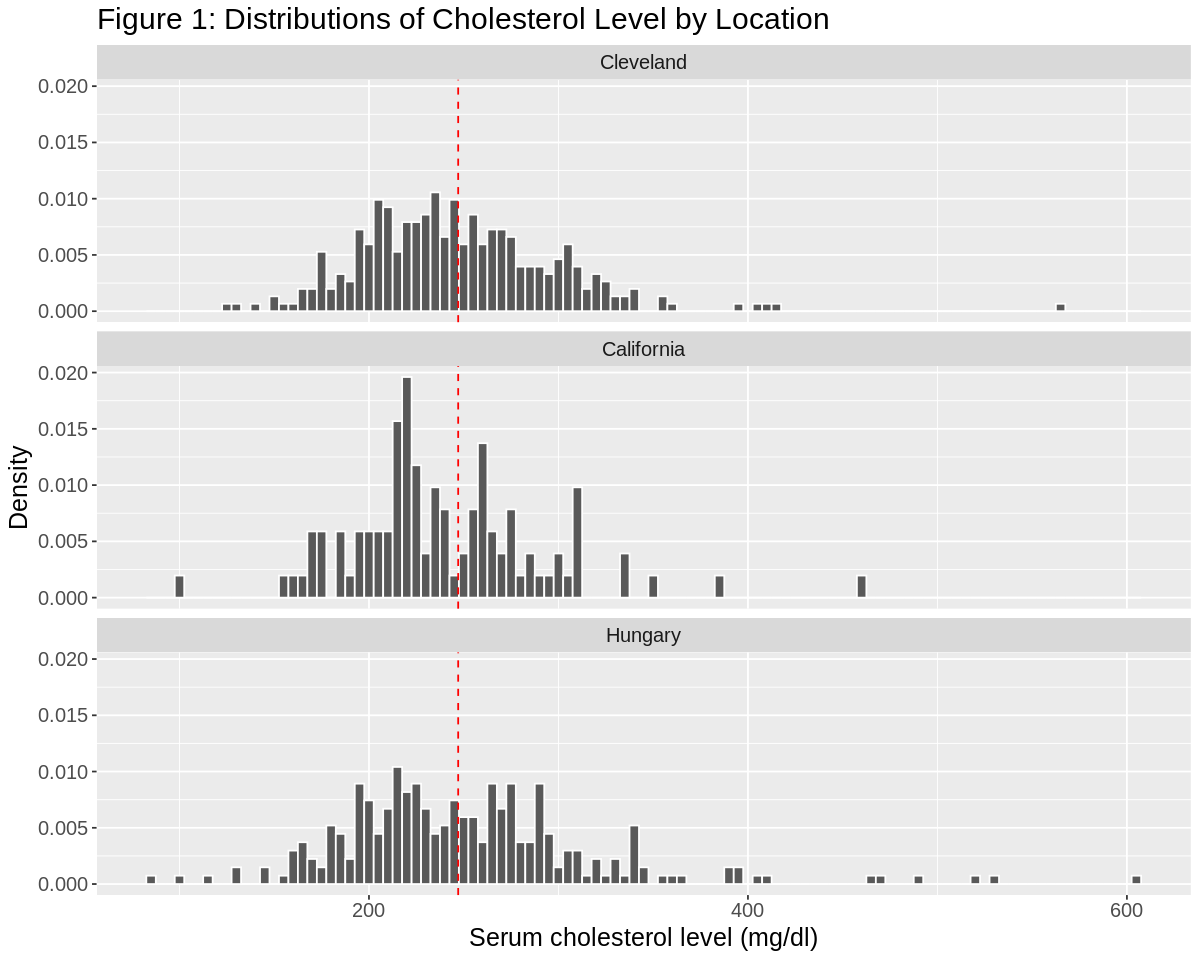

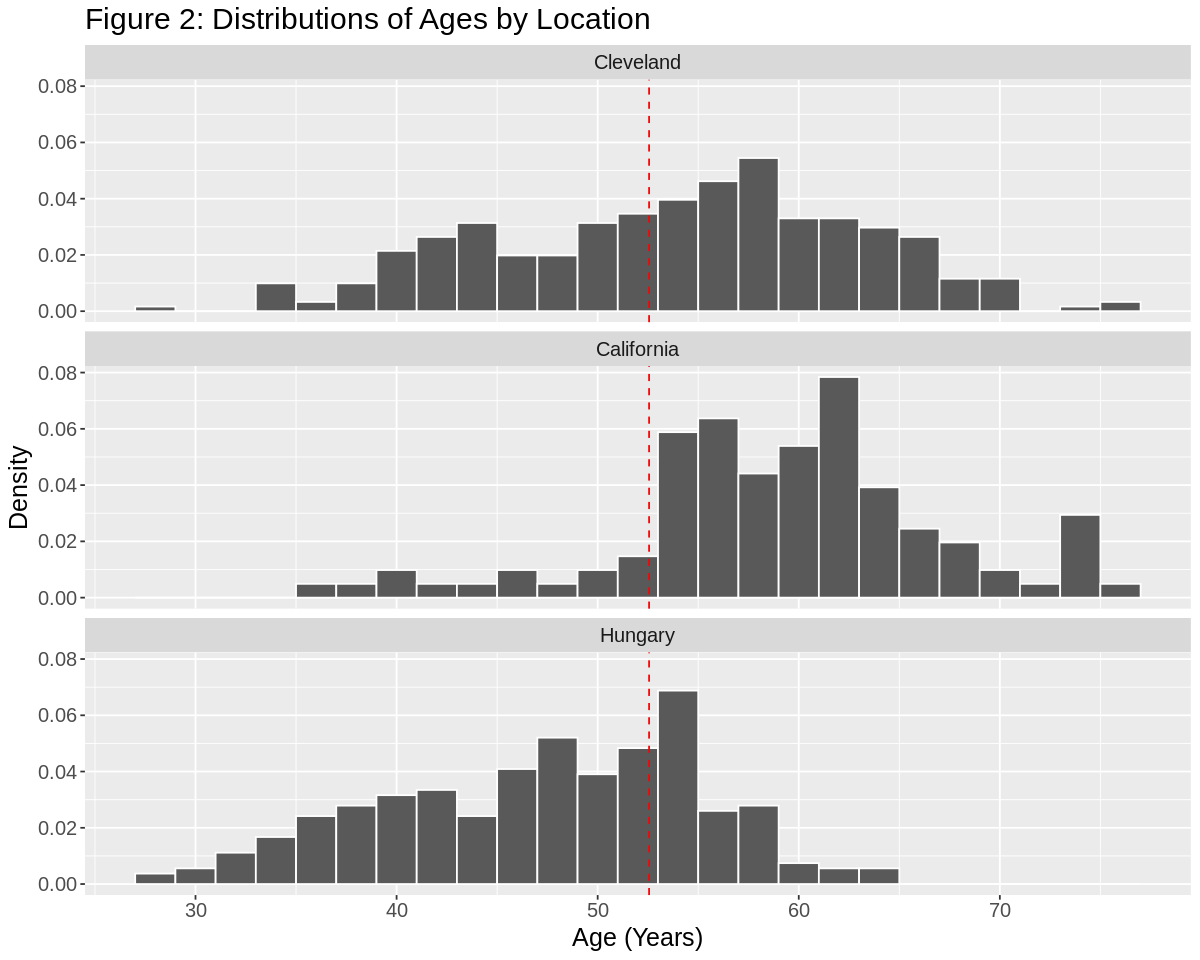

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)

# Distribution of cholesterol levels in each location 
dist_total_chol <- total_heart %>% 
    ggplot() + 
    geom_histogram(aes(x = chol, y = ..density..), color = 'white', binwidth = 5) +
    labs(x = "Serum cholesterol level (mg/dl)", y = "Density") + 
    facet_wrap(~location, scales = "fixed", nrow = 5) +
    ggtitle("Figure 1: Distributions of Cholesterol Level by Location") + 
    geom_vline(xintercept = mean(total_heart$chol), linetype = "dashed", color = "red") +
    theme(text = element_text(size = 15)) 
dist_total_chol

# Distribution of age in each location 
dist_total_age <- total_heart %>% 
    # filter(sex == 1) %>% 
    ggplot() + 
    geom_histogram(aes(x = age, y = ..density..), color = 'white', binwidth = 2) +
    labs(x = "Age (Years)", y = "Density") + 
    facet_wrap(~location, scales = "fixed", nrow = 5) +
    ggtitle("Figure 2: Distributions of Ages by Location") + 
    geom_vline(xintercept = mean(total_heart$age), linetype = "dashed", color = "red") +
    theme(text = element_text(size = 15)) 
dist_total_age

#### 2.3.2. Boxplots of continuous variables
- Boxplots are used to illustrate the distribution and spread of cholesterol levels and ages in each location.
- The ranges and means of `chol` in each location are relatively similar.
- The median `chol` for California is slightly lower compared to the other locations.
- The mean and median `age` for each location apper to be significantly different from each other.

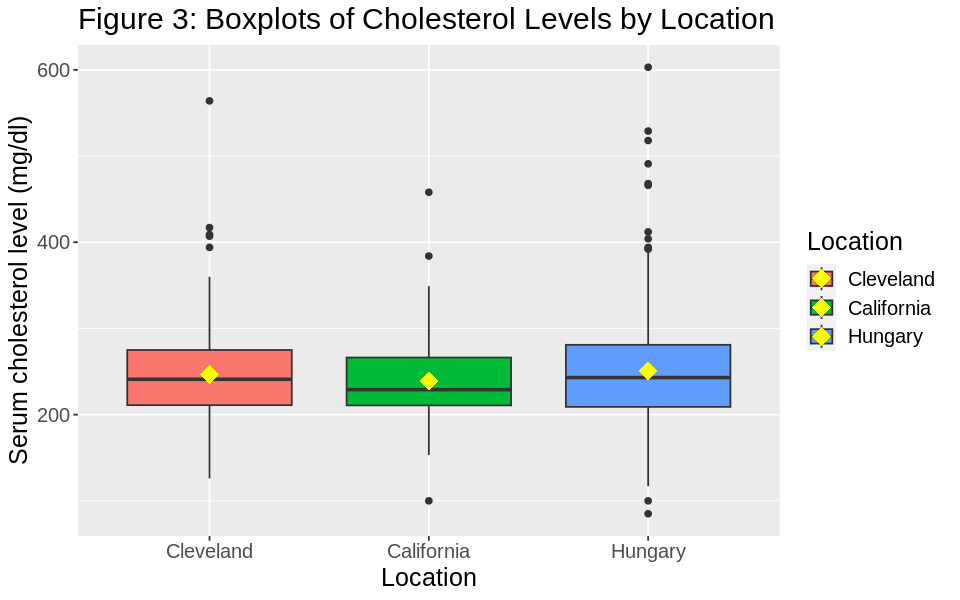

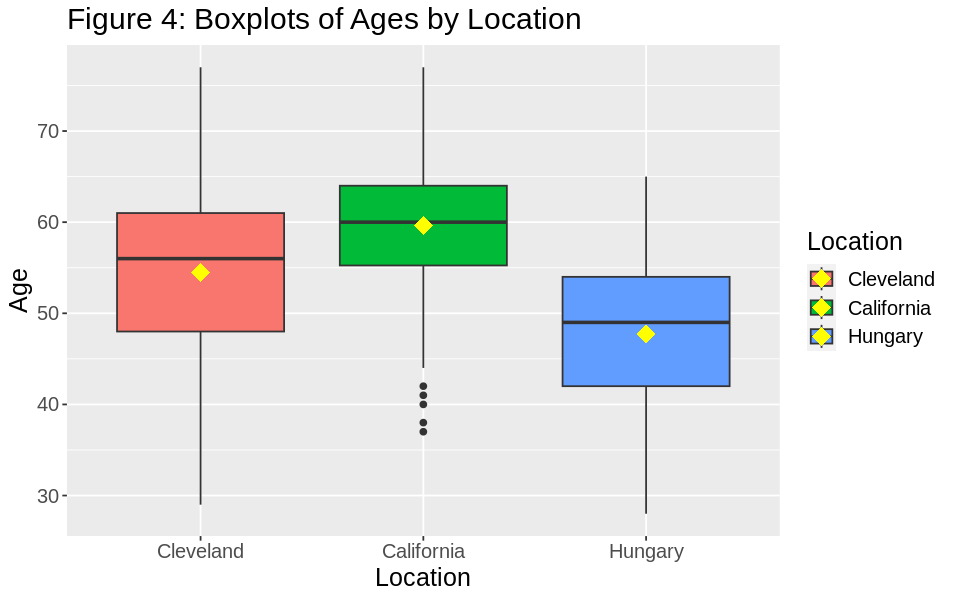

In [6]:
options(repr.plot.width = 8, repr.plot.height = 5)

# Boxplots of Cholesterol Levels by Location
box_total <- total_heart %>% 
    ggplot(aes(x = location, y = chol, fill = location)) + 
    geom_boxplot() + 
    labs(x = "Location", y = "Serum cholesterol level (mg/dl)", fill = "Location") + 
    ggtitle("Figure 3: Boxplots of Cholesterol Levels by Location") +
    theme(text = element_text(size = 15)) + 
    stat_summary(aes(location, chol, fill = location),
        fun = "mean", colour = "yellow", geom = "point",
        shape = 18, size = 5
    )
box_total

# Boxplots of Ages by Location
box_total <- total_heart %>% 
    ggplot(aes(x = location, y = age, fill = location)) + 
    geom_boxplot() + 
    labs(x = "Location", y = "Age", fill = "Location") + 
    ggtitle("Figure 4: Boxplots of Ages by Location") + 
    theme(text = element_text(size = 15)) + 
    stat_summary(aes(location, age, fill = location),
        fun = "mean", colour = "yellow", geom = "point",
        shape = 18, size = 5
    )
box_total

#### 2.3.3. Bar plots of average cholesterol level against age ranges
- Bar plot is used to give an idea of how `age` would affect average `chol`.
- Average `chol` are significantly lower for people of `age` less than 30, and relatively similar for people with `age` of 30 or above.

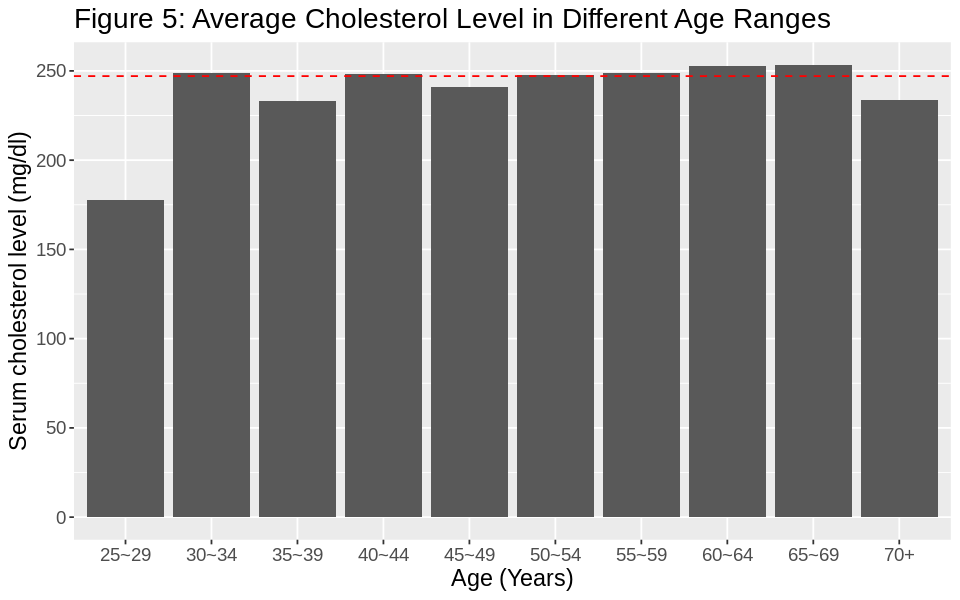

In [7]:
options(repr.plot.width = 8, repr.plot.height = 5)
heart.dat <- total_heart %>%
    group_by(age) %>%
    summarize(chol = mean(chol, na.rm=TRUE))
# heart.dat

heart.col2 <- heart.dat %>%
    filter(age >= 25,age < 30) %>%
    dplyr::select(chol)
col.val2 <- sum(heart.col2)/nrow(heart.col2)
heart.col3 <- heart.dat %>%
    filter(age >= 30,age < 35) %>%
    dplyr::select(chol)
col.val3 <- sum(heart.col3)/nrow(heart.col3)
heart.col4 <- heart.dat %>%
    filter(age >= 35,age < 40) %>%
    dplyr::select(chol)
col.val4 <- sum(heart.col4)/nrow(heart.col4)
heart.col5 <- heart.dat %>%
    filter(age >= 40,age < 45) %>%
    dplyr::select(chol)
col.val5 <- sum(heart.col5)/nrow(heart.col5)
heart.col6 <- heart.dat %>%
    filter(age >= 45,age < 50) %>%
    dplyr::select(chol)
col.val6 <- sum(heart.col6)/nrow(heart.col6)
heart.col7 <- heart.dat %>%
    filter(age >= 50,age < 55) %>%
    dplyr::select(chol)
col.val7 <- sum(heart.col7)/nrow(heart.col7)
heart.col8 <- heart.dat %>%
    filter(age >= 55,age < 60) %>%
    dplyr::select(chol)
col.val8 <- sum(heart.col8)/nrow(heart.col8)
heart.col9 <- heart.dat %>%
    filter(age >= 60,age < 65) %>%
    dplyr::select(chol)
col.val9 <- sum(heart.col9)/nrow(heart.col9)
heart.col10 <- heart.dat %>%
    filter(age >= 65,age < 70) %>%
    dplyr::select(chol)
col.val10 <- sum(heart.col10)/nrow(heart.col10)
heart.col11 <- heart.dat %>%
    filter(age >= 70) %>%
    dplyr::select(chol)
col.val11 <- sum(heart.col11)/nrow(heart.col11)
heart.name <- c("25~29","30~34","35~39","40~44","45~49","50~54","55~59","60~64","65~69","70+")
heart.plot.data <- data.frame(heart.name,c(col.val2,col.val3,col.val4,col.val5,col.val6,col.val7,col.val8,col.val9,col.val10,col.val11))
colnames(heart.plot.data) <- c("heart.range","chol.avg")

age_chol_bar_plot <- ggplot(heart.plot.data, aes(x = heart.range, y = chol.avg)) +
    geom_bar(stat="identity") +
    ggtitle("Figure 5: Average Cholesterol Level in Different Age Ranges") +
    labs(x = "Age (Years)",y = "Serum cholesterol level (mg/dl)") + 
    geom_hline(yintercept = mean(total_heart$chol), linetype = "dashed", color = "red") +
    # facet_wrap(~location, scales = "fixed", nrow = 3) +
    theme(text = element_text(size = 14))
age_chol_bar_plot

#### 2.3.4. Pair plots of all continous variables
- The correlations between all continuous variables are not particularly large, with the greatest correlation coefficient being between `age` and `trestbps` at 0.231.
- The correlations of `chol` with the other continous variables are not particularly high.

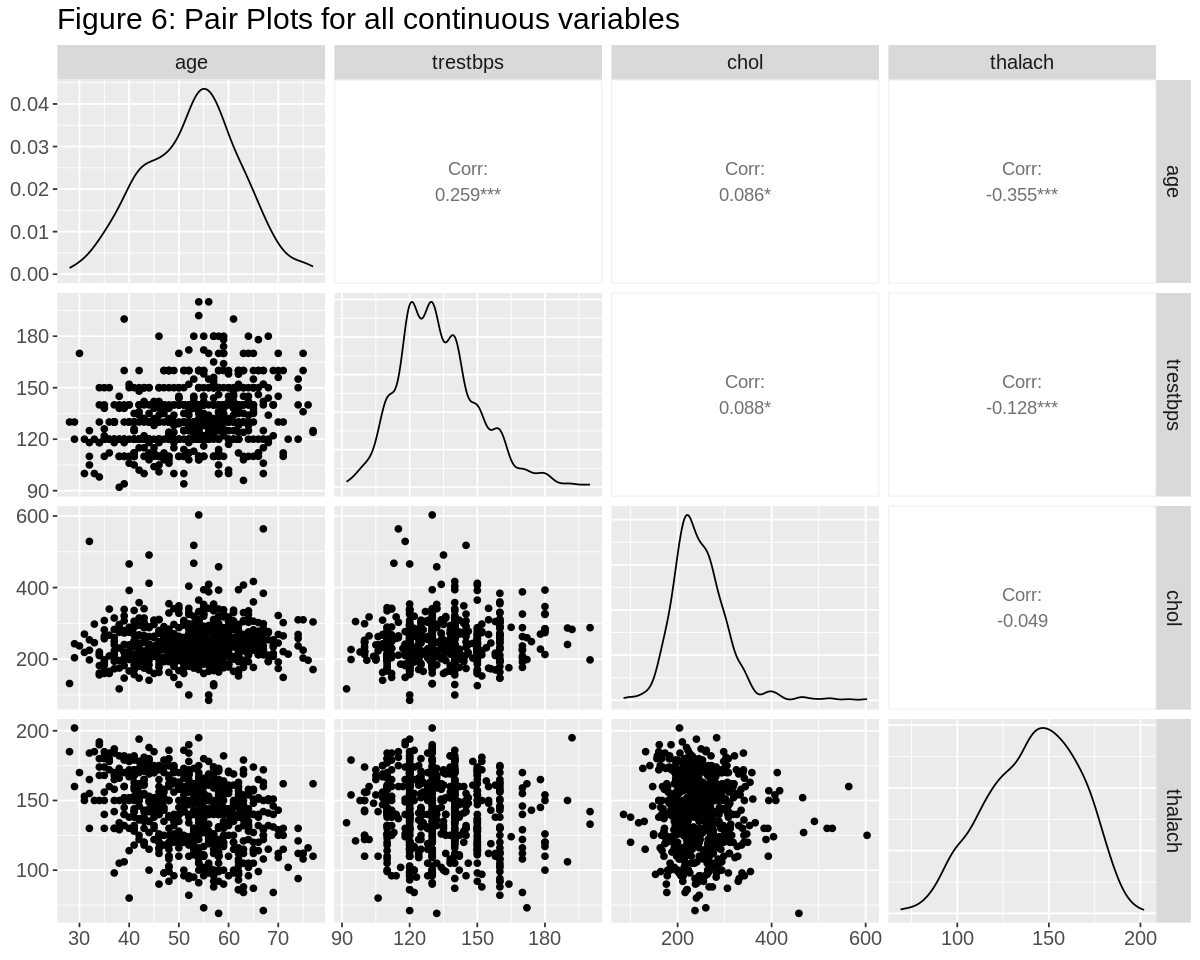

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8)

heart_pair_plots <- total_heart %>%
  dplyr::select(age, trestbps, chol, thalach) %>% 
  ggpairs(progress = FALSE) +
    ggtitle("Figure 6: Pair Plots for all continuous variables") +
  theme(
    text = element_text(size = 15),
    # plot.title = element_text(face = "bold"),
    # axis.title = element_text(face = "bold")
  )
heart_pair_plots

#### 2.3.5. Variance Inflation Factor (VIF) on variables
- VIF for each variable is calculated to test for multicollinearity, which could make it difficult to interpret coefficients, and it reduces the power of the model to identify statistically significant independent variables.
- `GVIF..1..2.Df..` is used for comparison due to different degrees of freedom for some variables.
- Horizontal line of VIF = 5 to indicate severe correlation of a variable with other variables; any variables with VIF > 5 are to be removed to reduce multicollinearity in the model.
- `GVIF..1..2.Df..` for all variables are significantly lower than 5, so multicollinearity between all variables is relatively low, thus no variables need to be removed

GVIF     Df GVIF..1..2.Df.. variable
location 2.409002 2  1.245831        location
age      1.501386 1  1.225311        age     
sex      1.126742 1  1.061481        sex     
cp       1.200695 3  1.030953        cp      
trestbps 1.107297 1  1.052282        trestbps
chol     1.080300 1  1.039375        chol    
restecg  1.631578 2  1.130191        restecg 
thalach  1.497189 1  1.223597        thalach 
exang    1.115779 1  1.056304        exang

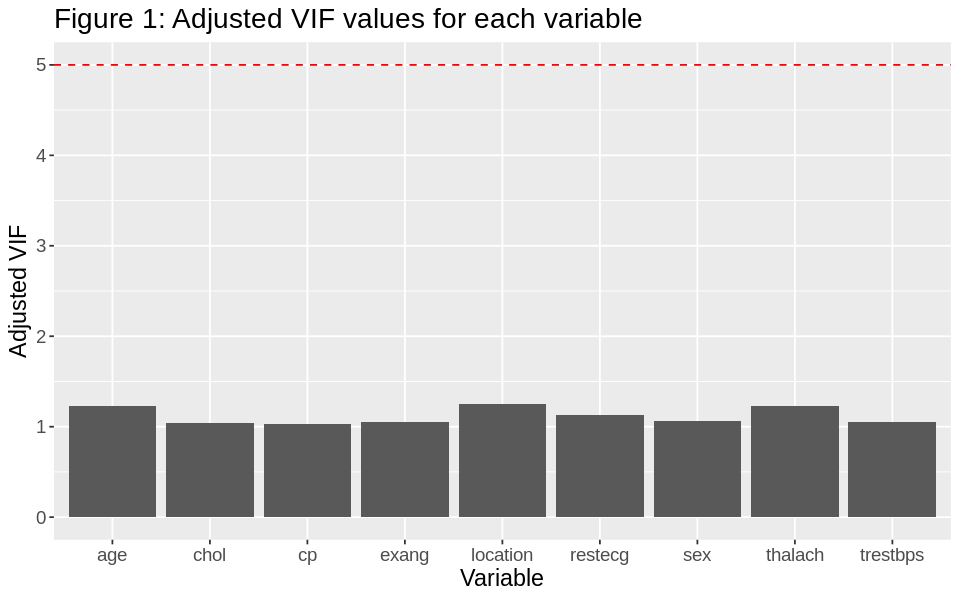

In [9]:
options(repr.plot.width = 8, repr.plot.height = 5)

total_heart <- total_heart %>% 
    dplyr::select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num)
VIF_prep <- glm(num ~ ., data = total_heart, family = binomial)
heart_MLR_add_inter_VIF <- data.frame(vif(VIF_prep))
# heart_MLR_add_inter_VIF <- vif(VIF_prep)
heart_MLR_add_inter_VIF$variable <- c("location", "age", "sex", "cp", "trestbps", "chol", "restecg", "thalach", "exang") 
heart_MLR_add_inter_VIF

# VIF graph
heart_MLR_add_inter_VIF_vis <- ggplot(heart_MLR_add_inter_VIF, aes(x = variable, y = GVIF..1..2.Df..)) +
    geom_bar(stat = "identity") +
    ggtitle("Figure 1: Adjusted VIF values for each variable") +
    labs(x = "Variable",y = "Adjusted VIF") + 
    geom_hline(yintercept = 5, linetype = "dashed", color = "red") +
    theme(text = element_text(size = 14))
heart_MLR_add_inter_VIF_vis

#### 2.3.6. MLR and scatterplot of cholesterol level against age by location
- Additive MLR model with `chol` as response, `age` and `location` as input variables, illustrated on the scatterplot of `chol` against `age`, and with interaction between input variables.
- The slope of the California line is close to 0, while the slope of the Hungary line is slightly lower than that of Cleveland.


Call:
lm(formula = chol ~ age * location, data = total_heart)

Coefficients:
           (Intercept)                     age      locationCalifornia  
              181.5325                  1.1969                 55.4845  
       locationHungary  age:locationCalifornia     age:locationHungary  
               32.0623                 -1.1588                 -0.4247  


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


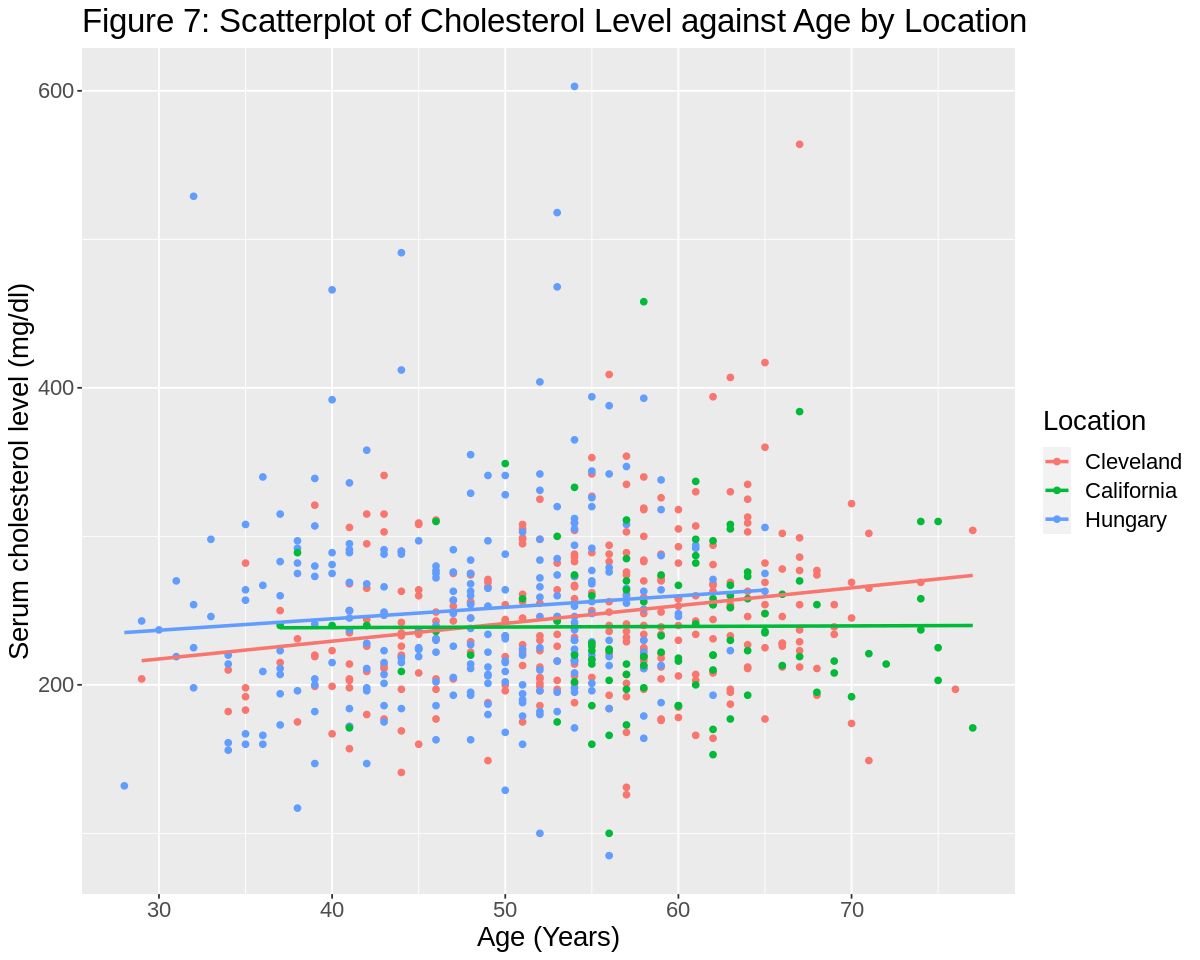

In [10]:
options(repr.plot.width = 10, repr.plot.height = 8)

heart_MLR_chol_age_full <- lm(chol ~ age * location, data = total_heart) 
heart_MLR_chol_age_full

total_heart$pred_MLR_add_inter <- predict(heart_MLR_chol_age_full) # Using predict() to create estimated regression lines.

heart_MLR_chol_age_full_plot <- ggplot(total_heart, aes(
  x = age,
  y = chol,
  color = location
)) +
  geom_point() +
  geom_line(aes(y = pred_MLR_add_inter), size = 1) +
  labs(
    title = "Figure 7: Scatterplot of Cholesterol Level against Age by Location",
    x = "Age (Years)",
    y = "Serum cholesterol level (mg/dl)"
  ) +
  theme(
    text = element_text(size = 16.5),
    # plot.title = element_text(face = "bold"),
    # axis.title = element_text(face = "bold"),
    # legend.title = element_text(face = "bold"),
  ) +
  labs(color = "Location")
heart_MLR_chol_age_full_plot

total_heart <- total_heart[-c(11, 12)]
# head(total_heart)

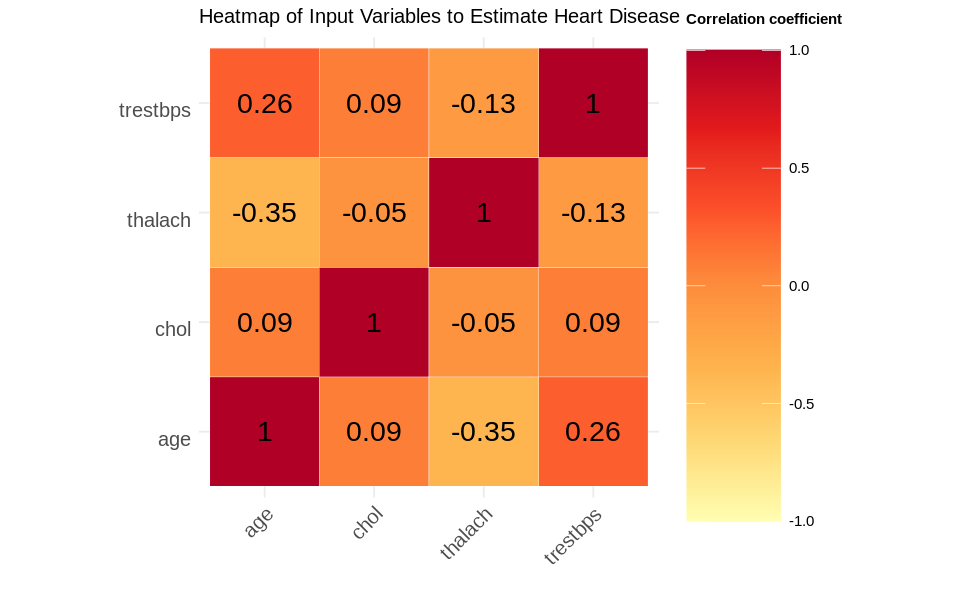

In [11]:
corr_matrix_heart <- total_heart %>%  
    dplyr::select(age, trestbps, chol, thalach) %>% 
    cor() %>%
    as.data.frame() %>%
    rownames_to_column("var1") %>%
    pivot_longer(-var1, names_to = "var2", values_to = "corr")
# head(corr_matrix_heart)

options(repr.plot.width = 8, repr.plot.height = 5)

plot_corr_matrix_heart <- corr_matrix_heart %>%
    ggplot(aes(var1, var2)) +
    geom_tile(aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation coefficient \n",
        palette = "YlOrRd",
        direction = 1, limits = c(-1, 1)
    ) +
    labs(x = "", y = "") +
    ggtitle("Heatmap of Input Variables to Estimate Heart Disease") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(
            angle = 45, vjust = 1,
            size = 12, hjust = 1
        ),
        axis.text.y = element_text(
            vjust = 1,
            size = 12, hjust = 1
        ),
        legend.title = element_text(size = 9, face = "bold"), 
        legend.text = element_text(size = 9), 
        legend.key.size = unit(2, "cm"),
        plot.title = element_text(size = 12)
    ) + 
    coord_fixed() + 
    geom_text(aes(var2, var1, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_heart

In [12]:
emplogit = function(x, y, binsize = NULL, ci = FALSE, probit = FALSE,
                    prob = FALSE, main = NULL, xlab = "", ylab = ""){
  # x         vector with values of the independent variable
  # y         vector of binary responses
  # binsize   integer value specifying bin size (optional)
  # ci        logical value indicating whether to plot approximate
  #           confidence intervals (not supported as of 02/08/2015)
  # probit    logical value indicating whether to plot probits instead
  #           of logits
  # prob      logical value indicating whether to plot probabilities
  #           without transforming
  #
  # the rest are the familiar plotting options

  if (length(x) != length(y))
    stop("x and y lengths differ")
  if (any(y < 0 | y > 1))
    stop("y not between 0 and 1")
  if (length(x) < 100 & is.null(binsize))
    stop("Less than 100 observations: specify binsize manually")

  if (is.null(binsize)) binsize = min(round(length(x)/10), 50)

  if (probit){
    link = qnorm
    if (is.null(main)) main = "Empirical probits"
  } else {
    link = function(x) log(x/(1-x))
    if (is.null(main)) main = "Empirical logits"
  }

  sort = order(x)
  x = x[sort]
  y = y[sort]
  a = seq(1, length(x), by=binsize)
  b = c(a[-1] - 1, length(x))

  prob = xmean = ns = rep(0, length(a)) # ns is for CIs
  for (i in 1:length(a)){
    range = (a[i]):(b[i])
    prob[i] = mean(y[range])
    xmean[i] = mean(x[range])
    ns[i] = b[i] - a[i] + 1 # for CI 
  }

  extreme = (prob == 1 | prob == 0)
  prob[prob == 0] = min(prob[!extreme])
  prob[prob == 1] = max(prob[!extreme])

  g = link(prob) # logits (or probits if probit == TRUE)

  linear.fit = lm(g[!extreme] ~ xmean[!extreme])
  b0 = linear.fit$coef[1]
  b1 = linear.fit$coef[2]

  loess.fit = loess(g[!extreme] ~ xmean[!extreme])

    plot(xmean, g, main=main, xlab=xlab, ylab=ylab)
    abline(b0,b1)
    lines(loess.fit$x, loess.fit$fitted, lwd=2, lty=2)
}

In [13]:
emplogit = function(x, y, binsize = NULL, ci = FALSE, probit = FALSE,
                    prob = FALSE, main = NULL, xlab = "", ylab = ""){
  # x         vector with values of the independent variable
  # y         vector of binary responses
  # binsize   integer value specifying bin size (optional)
  # ci        logical value indicating whether to plot approximate
  #           confidence intervals (not supported as of 02/08/2015)
  # probit    logical value indicating whether to plot probits instead
  #           of logits
  # prob      logical value indicating whether to plot probabilities
  #           without transforming
  #
  # the rest are the familiar plotting options

  if (length(x) != length(y))
    stop("x and y lengths differ")
  if (any(y < 0 | y > 1))
    stop("y not between 0 and 1")
  if (length(x) < 100 & is.null(binsize))
    stop("Less than 100 observations: specify binsize manually")

  if (is.null(binsize)) binsize = min(round(length(x)/10), 50)

  if (probit){
    link = qnorm
    if (is.null(main)) main = "Empirical probits"
  } else {
    link = function(x) log(x/(1-x))
    if (is.null(main)) main = "Empirical logits"
  }

  sort = order(x)
  x = x[sort]
  y = y[sort]
  a = seq(1, length(x), by=binsize)
  b = c(a[-1] - 1, length(x))

  prob = xmean = ns = rep(0, length(a)) # ns is for CIs
  for (i in 1:length(a)){
    range = (a[i]):(b[i])
    prob[i] = mean(y[range])
    xmean[i] = mean(x[range])
    ns[i] = b[i] - a[i] + 1 # for CI 
  }

  extreme = (prob == 1 | prob == 0)
  prob[prob == 0] = min(prob[!extreme])
  prob[prob == 1] = max(prob[!extreme])

  g = link(prob) # logits (or probits if probit == TRUE)

  linear.fit = lm(g[!extreme] ~ xmean[!extreme])
  b0 = linear.fit$coef[1]
  b1 = linear.fit$coef[2]

  loess.fit = loess(g[!extreme] ~ xmean[!extreme])

    plot(xmean, g, main=main, xlab=xlab, ylab=ylab)
    abline(b0,b1)
    lines(loess.fit$x, loess.fit$fitted, lwd=2, lty=2)
}

In [14]:
total_heart_num <- total_heart[, which(names(total_heart) == "num")]

total_heart_location <- total_heart[, which(names(total_heart) == "location")]
total_heart_age <- total_heart[, which(names(total_heart) == "age")]
total_heart_sex <- total_heart[, which(names(total_heart) == "sex")]
total_heart_cp <- total_heart[, which(names(total_heart) == "cp")]
total_heart_trestbps <- total_heart[, which(names(total_heart) == "trestbps")]
total_heart_chol <- total_heart[, which(names(total_heart) == "chol")]
total_heart_restecg <- total_heart[, which(names(total_heart) == "restecg")]
total_heart_thalach <- total_heart[, which(names(total_heart) == "thalach")]
total_heart_exang <- total_heart[, which(names(total_heart) == "exang")]
total_heart_num

# emplogit(total_heart_age, total_heart_num)


[1] 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 [38] 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 [75] 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1
[112] 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0
[149] 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1
[186] 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0
[223] 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
[260] 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0
[297] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
[482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[519] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1
[593] 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0
[630] 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
[667] 0 1 1 1 1 1 1 1
Levels: 0 1

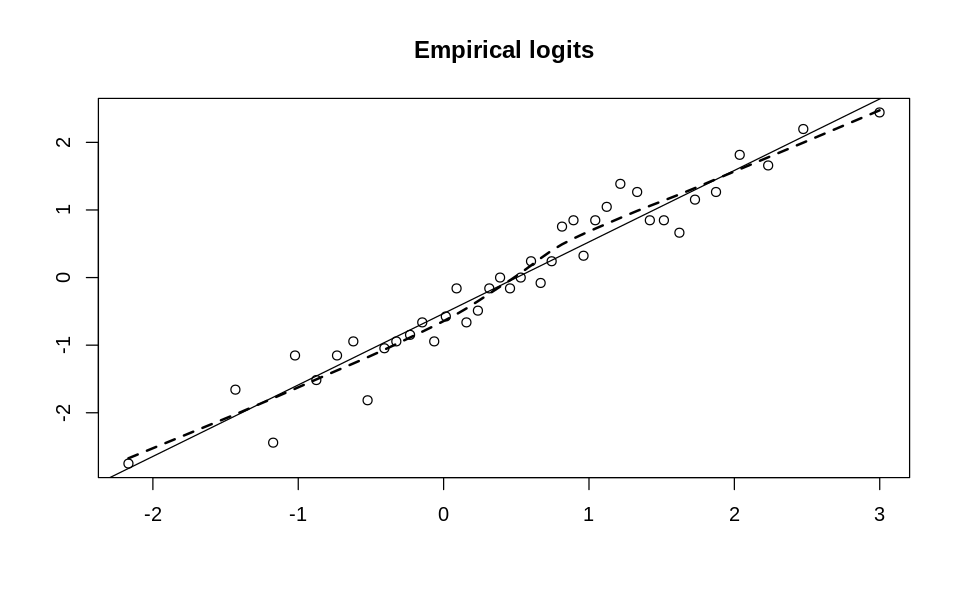

In [20]:
set.seed(1234)
n = 2000
x1 = exp(rnorm(n/2, mean=0, sd=1))
x2 = exp(rnorm(n/2, mean=1, sd=1))
x = c(x1, x2)
y = c(rep(0, n/2), rep(1, n/2))
# x
emplogit(log(x), y)

In [ ]:
total_heart1 <- rbind(Cleveland_heart, Hungary_heart, Switzerland_heart, California_heart) %>% 
    dplyr::select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num) %>% 
    filter(!(location == '?' | age == '?' | sex == '?' | cp == '?' | trestbps == '?' | trestbps == '0' | chol == '?' | chol == '0' | restecg == '?' | thalach == '?' | num == '?')) %>% 
    mutate(num = ifelse(num >= 1, 1, num)) %>%
    transform(trestbps = as.double(trestbps), chol = as.double(chol), restecg = as.factor(restecg), thalach = as.double(thalach))

x1 = total_heart1$age
x2 = total_heart1$trestbps
x3 = total_heart1$chol
x4 = total_heart1$thalach
y = total_heart1$num
par(mfrow = c(2, 2))
emplogit(log(x1), y, main = "log(age)", xlab = "X1", ylab = "Logit for num")
emplogit(log(x2), y, main = "log(trestbps)", xlab = "X2", ylab = "Logit for num")
emplogit(log(x3), y, main = "log(chol)", xlab = "X3", ylab = "Logit for num")
emplogit(log(x4), y, main = "log(thalach)", xlab = "X4", ylab = "Logit for num")
par(mfrow = c(1, 1))

### 3.3. Generative model
- 

In [ ]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

total_heart$ID <- rownames(total_heart)
training_heart <- sample_n(total_heart, size = nrow(total_heart) * 0.70,
  replace = FALSE
)

second_set_heart <- anti_join(total_heart,
  training_heart,
  by = "ID"
)

training_heart <- training_heart[,-11]
second_set_heart <- second_set_heart[,-11]

# head(training_heart)
# nrow(training_heart)

# head(second_set_heart)
# nrow(second_set_heart)

heart_backward_sel <- regsubsets(
  x = chol ~ ., # Response variable 
  nvmax = 13, # Number of variables wanted in model 
  data = second_set_heart, # Dataset
  method = "backward", # Method type 
)
heart_backward_sel

heart_bwd_summary <- summary(heart_backward_sel)
heart_bwd_summary

heart_bwd_summary_df <- data.frame(
   n_input_variables = 1:13,
   RSQ = heart_bwd_summary$rsq,
   RSS = heart_bwd_summary$rss,
   ADJ.R2 = heart_bwd_summary$adjr2
)
heart_bwd_summary_df

total_heart <- total_heart[-c(11, 12)]

### 2.4. Summary statistics for explanatory and response variables
The data below consists of summary data for the overall population: 
- `total_heart_pop_data`: For each location, the mean (`heart_chol_mean`), standard deviation (`heart_chol_sd`), and median (`heart_chol_median`) of cholesterol level values, mean (`heart_age_mean`), standard deviation (`heart_age_sd`), and median (`heart_age_median`) of ages, and quantity (`n`) of patients are measured.

In [ ]:
# Count number of each combination of year and location
countPatients <- total_heart %>% 
    group_by(location) %>%
    tally() 

# Obtaining point estimates for each combination of location and year
total_heart_pop_data <- total_heart %>% 
    group_by(location) %>% 
    summarize(
        heart_chol_mean = mean(chol), 
        heart_chol_sd = sd(chol), 
        heart_chol_median = median(chol), 
        heart_age_mean = mean(age), 
        heart_age_sd = sd(age), 
        heart_age_median = median(age)
    ) %>% 
    inner_join(countPatients) 
total_heart_pop_data

## 3. Methods and Results

The dataset contains measurements for cholesterol levels in separate locations, and the VIF values for all explanatory variables are relatively low, allowing for potential variations in cholesterol levels due to any non-age variables to be accounted for.

So far, we have examined the difference in slopes of cholesterol level against age between each location. However, we cannot know with our preliminary results if the calculated values are statistically significant. For our results to be more trustworthy, the following have been implemented:

- 

<!-- We anticipate ___. This improvement would be reflected in ___, indicating that ___.

Our study aims to ___. -->

### 3.1. Tidy table
- 
- Using significance level $\alpha = 0.05$, there is sufficient evidence to reject the null hypothesis that the change in `chol` per unit change in `age` in Cleveland is 0.
- Using significance level $\alpha = 0.05$, there is insufficient evidence to reject the null hypothesis that the change in `chol` per unit change in `age` is the same between each location. 

In [ ]:
heart_MLR_chol_age_full <- lm(chol ~ age * location, data = total_heart) 

heart_MLR_chol_age_full_results <- tidy(heart_MLR_chol_age_full, conf.int = TRUE, conf.level = 0.95)
heart_MLR_chol_age_full_results

heart_MLR_chol_age_full_gof <- glance(heart_MLR_chol_age_full)
heart_MLR_chol_age_full_gof

heart_MLR_chol_age_full_augment <- augment(heart_MLR_chol_age_full)
head(heart_MLR_chol_age_full_augment)

my_gof <- heart_MLR_chol_age_full_augment %>% 
 summarise(RSS = sum(.resid^2), TSS = (sd(chol))^2*(heart_MLR_chol_age_full_gof$nobs - 1),
           myR2 = 1 - RSS/TSS, my.adjR2 = 1 - (RSS/heart_MLR_chol_age_full_gof$df.residual)/(TSS/(heart_MLR_chol_age_full_gof$nobs - 1)),
           my.sigma = sqrt(RSS/heart_MLR_chol_age_full_gof$df.residual))
head(my_gof)

heart_MLR_full_results <- tidy(lm(chol ~ age * ., data = total_heart) , conf.int = TRUE, conf.level = 0.95)
heart_MLR_full_results

### 3.2. Tidy table
- Using significance level $\alpha = 0.05$.
- 1: Fail to reject the null hypothesis; not enough evidence that the full model with additional interaction terms is better than the linear model (reduced) model
- 2: Fail to reject the null hypothesis; not enough evidence that the full model with additional interaction terms is better than the additive (reduced) model

In [ ]:
# heart_MLR_chol_age_null_full <- anova(lm(chol ~ 1, data = total_heart), heart_MLR_chol_age_full)
# heart_MLR_chol_age_null_full

heart_MLR_chol_age_nonadd_full <- anova(lm(chol ~ age, data = total_heart), heart_MLR_chol_age_full)
heart_MLR_chol_age_nonadd_full

heart_MLR_chol_age_add_full <- anova(lm(chol ~ age + location, data = total_heart), heart_MLR_chol_age_full)
heart_MLR_chol_age_add_full 

# tidy(lm(chol ~ ., data = total_heart))

heart_MLR_ANOVA <- anova(lm(num ~ . - cp, data = total_heart), lm(num ~ ., data = total_heart))
heart_MLR_ANOVA

### 3.3. Bootstrap Sampling Distribution vs Central Limit Theorem (CLT) for slope in each location 
- Bootstrap sampling distribution of slopes is obtained using the `infer` package.
    - The original sample is used as an estimate of the overall population. 
    - Bootstrap samples are created by sampling from the original sample with replacement.
        - Each bootstrap sample is equal to the original sample size.
    - Bootstrapping is repeated 1000 times to obtain 1000 separate bootstrap samples. 
    - The point estimate (Slope) is calculated for each replicated bootstrap sample to obtain a bootstrap sampling distribution of the estimate.
- 95% confidence interval of slope by bootstrapping is obtained using `get_confidence_interval()`.
- `shade_confidence_interval()` is used on the plot to visualise the 95% confidence interval of differences in means.
- `ggplot` is used to visualise `CLE_boot_diff_in_means`, along with `CLE_clt_samp_dist` and `CLE_boot_diff_in_means_ci`.
- The steps above are applied separately for each location.

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 4)
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# _________________________________________________
## CLEVELAND 
# Bootstrap samples for slope
CLE_boot_diff_in_means <- total_heart %>% 
    filter(location == "Cleveland") %>% 
    specify(formula = chol ~ age) %>%
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "slope")
# heart_MLR_chol_age_full_results$estimate[1]
# Normal distribution
CLE_clt_samp_dist <- 
    tibble(
        x = seq(heart_MLR_chol_age_full_results$estimate[2] - 4 * heart_MLR_chol_age_full_results$std.error[2], 
                heart_MLR_chol_age_full_results$estimate[2] + 4 * heart_MLR_chol_age_full_results$std.error[2], 0.0001),
        density = dnorm(x, heart_MLR_chol_age_full_results$estimate[2], heart_MLR_chol_age_full_results$std.error[2])
    )

# 95% confidence interval obtained from bootstrap samples 
CLE_boot_diff_in_means_ci <- CLE_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
CLE_boot_diff_in_means_plot <- CLE_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 30, color = 'white') + 
    # shade_p_value(obs_stat = CLE_obs_diff_in_means, direction = "greater") + 
    ggtitle("Figure 8: Bootstrap Hypothesis Test for Slope (Cleveland)") + 
    xlab("Slope of Cholesterol Level against age (mg(dl)^{-1}(Years)^{-1})") + 
    geom_line(data = CLE_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = CLE_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15)) 
# +
#     scale_x_continuous(limits = c(-2, 2), breaks = seq(-2, 2, by = 0.5)) + 
#     scale_y_continuous(limits = c(0, 1.5), breaks = seq(0, 1.5, by = 0.25))
CLE_boot_diff_in_means_plot

# _________________________________________________
## CALIFORNIA 
# Bootstrap samples for slope
CAL_boot_diff_in_means <- total_heart %>% 
    filter(location == "California") %>% 
    specify(formula = chol ~ age) %>%
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "slope")

# # Normal distribution
CAL_clt_samp_dist <- 
    tibble(
        x = seq((heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[5]) - 4 * (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[5]), 
                (heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[5]) + 4 * (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[5]), 0.0001),
        density = dnorm(x, (heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[5]), (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[5]))
    )

# 95% confidence interval obtained from bootstrap samples 
CAL_boot_diff_in_means_ci <- CAL_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
CAL_boot_diff_in_means_plot <- CAL_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 30, color = 'white') + 
    # shade_p_value(obs_stat = CAL_obs_diff_in_means, direction = "greater") + 
    ggtitle("Figure 9: Bootstrap Hypothesis Test for Slope (California)") + 
    xlab("Slope of Cholesterol Level against age (mg(dl)^{-1}(Years)^{-1})") + 
    geom_line(data = CAL_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = CAL_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15)) 
# +
#     scale_x_continuous(limits = c(-2, 2), breaks = seq(-2, 2, by = 0.5)) + 
#     scale_y_continuous(limits = c(0, 1.5), breaks = seq(0, 1.5, by = 0.25))
CAL_boot_diff_in_means_plot

# _________________________________________________
## HUNGARY 
# Bootstrap samples for slope
HUN_boot_diff_in_means <- total_heart %>% 
    filter(location == "Hungary") %>% 
    specify(formula = chol ~ age) %>%
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "slope")

# Normal distribution
HUN_clt_samp_dist <- 
    tibble(
        x = seq((heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[6]) - 4 * (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[6]), 
                (heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[6]) + 4 * (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[6]), 0.0001),
        density = dnorm(x, (heart_MLR_chol_age_full_results$estimate[2] + heart_MLR_chol_age_full_results$estimate[6]), (heart_MLR_chol_age_full_results$std.error[2] + heart_MLR_chol_age_full_results$std.error[6]))
    )

# 95% confidence interval obtained from bootstrap samples 
HUN_boot_diff_in_means_ci <- HUN_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
HUN_boot_diff_in_means_plot <- HUN_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 30, color = 'white') + 
    # shade_p_value(obs_stat = HUN_obs_diff_in_means, direction = "greater") + 
    ggtitle("Figure 10: Bootstrap Hypothesis Test for Slope (Hungary)") + 
    xlab("Slope of Cholesterol Level against age (mg(dl)^{-1}(Years)^{-1})") + 
    geom_line(data = HUN_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = HUN_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15)) 
# +
#     scale_x_continuous(limits = c(-2, 2), breaks = seq(-2, 2, by = 0.5)) + 
#     scale_y_continuous(limits = c(0, 1.5), breaks = seq(0, 1.5, by = 0.25))
HUN_boot_diff_in_means_plot

### 3.4. Confidence intervals based on bootstrapping and CLT
- The CLT states that if the sample size $n$ is sufficiently large, the sampling distribution will be approximately normally distributed, even if the underlying distribution of individual observations in the population is not normally distributed. 
- The 95% CLT confidence interval is chosen over bootstrapping, as the parameter we are investigating is the slope of cholesterol level against age, and each individual sample size is greater than 100.
- Since the variance of the normal distribution is unknown, we will need to estimate it. This will be accounted for by having the sampling distribution of mean differences follow a t-distribution with $n - 1$ degrees of freedom.

In [ ]:
total_boot_diff_in_means_ci <- dplyr::bind_rows(
    CLE_boot_diff_in_means_ci, 
    CAL_boot_diff_in_means_ci, 
    HUN_boot_diff_in_means_ci
) %>% 
    mutate(location = c("Cleveland", "California", "Hungary")) %>% 
    rename(
        lower_ci_boot = lower_ci, 
        upper_ci_boot = upper_ci
    ) %>% 
    dplyr::select(location, lower_ci_boot, upper_ci_boot)
total_boot_diff_in_means_ci

# total_clt_diff_in_means_ci <- tibble(
#     location = c("Cleveland", "California", "Hungary"), 
#     lower_ci_clt = total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[c(1, 2, 3, 4, 5)] - qnorm(0.975) * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[c(1, 2, 3, 4, 5)],
#     upper_ci_clt = total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[c(1, 2, 3, 4, 5)] + qnorm(0.975) * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[c(1, 2, 3, 4, 5)]
# )
# total_clt_diff_in_means_ci

# total_diff_in_means_ci <- list(
#     total_boot_diff_in_means_ci, 
#     total_clt_diff_in_means_ci
# ) %>% 
#     reduce(full_join, by = "location") 
# total_diff_in_means_ci

### 3.5. Regularised regression models
- Regularised regression to create appropriate model, which can mitigate multicollinearity further by smoothly shrinking the coefficients involved.
- For the sake of exhaustiveness, both Ridge regression and LASSO regression will be implemented: 
    - Numerous medical studies indicate multidirectional associations between multiple biological factors (e.g. Age, heart rate, blood pressure), all variables may influence the result; Ridge regression is used to allow for better interpretability by shrinking less relevant variables while allowing all variables to contribute to the model, including dummy variables.
    - LASSO regression can outright remove less relevant variables by decreasing variable coefficients to 0, reducing overfitting of the model and making them more intepretable; model may become more biased as a result of removed variables, dummy variables may be removed from model as well.
- Assumptions: 
    - Each observation is independent of one another.
    - Variables are homoscedastic.
    - Residuals of the model are normally distributed.
- Limitations: 
    - Regularised regression models may not effectively fit to the data, due to a significant portion of the variables being categorical, leading to additional multicollinearity, difficulty in handling new categories that may not be present in the testing data, and difficultly in interpreting the impact of individual categories due to having multiple coefficients; can be mitigated with the use of dummy encoding.
    - Models may be less effective than the full model if the relationship between `num` and the other variables is not relatively linear.
    - `num` is meant to be a categorical variable, and thus will require classifiers to obtain usable predictions.
- Hypothesis tests for variables: 
    - $H_0: \beta_{j} = 0$ 
    - $H_1: \beta_{j} \neq 0$

#### Implementation of a proposed model
#### 3.1.1 Implementing one hot encoding
- Applied to improve regression model performance by mitigating issues with categorical variables.

In [ ]:
# dummy <- dummyVars(" ~ .", data = total_heart)
dummy <- dummyVars(" ~ .", data = total_heart, fullRank = T)
total_heart_OHE <- data.frame(predict(dummy, newdata = total_heart)) 
head(total_heart_OHE)
tail(total_heart_OHE)

In [ ]:
# total_heart_dumvar <- dummy_cols(total_heart, select_columns = c("location", ))

#### 3.1.2 Data splitting
- Split data into training data for model selection and testing data for model inference to reduce chance of rejecting $H_0$ within the LASSO model, and to allow for selection of relevant model features.

In [ ]:
# # Set seed for consistent results
# set.seed(1234567890) # DO NOT CHANGE!

# # Splitting of data 
# total_heart_split <- initial_split(total_heart_OHE, prop = 0.6, strata = num)
# training_total_heart <- training(total_heart_split)
# testing_total_heart <- testing(total_heart_split)
# head(training_total_heart)

# # Creation of matrices
# total_heart_train_X <- as.matrix(training_total_heart[, -which(names(training_total_heart) == "num")])
# total_heart_train_Y <- as.matrix(training_total_heart[, which(names(training_total_heart) == "num")])
# head(total_heart_train_X)

# total_heart_test_X <- as.matrix(testing_total_heart[, -which(names(training_total_heart) == "num")])
# total_heart_test_Y <- as.matrix(testing_total_heart[, which(names(training_total_heart) == "num")])

#### 3.1.3 Cross validation MSEs
- `lambda. min` selected to provide optimal value of λ as suggested by cross-validation MSEs.

In [ ]:
# # Set seed for consistent results
# set.seed(1234567890) # DO NOT CHANGE!
# options(repr.plot.width = 10, repr.plot.height = 4)

# # Cross validation to select smallest lambda for Ridge
# total_heart_cv_lambda_ridge <- cv.glmnet(
#   x = total_heart_train_X, y = total_heart_train_Y,
#   alpha = 0,
#   lambda = exp(seq(-4, 0, 0.05))
# )

# total_heart_cv_lambda_ridge_plot <- plot(total_heart_cv_lambda_ridge, main = "MSE of Ridge estimated by CV for different λ\n\n") 
# log(total_heart_cv_lambda_ridge$lambda.min)

# # Cross validation to select smallest lambda for LASSO 
# total_heart_cv_lambda_LASSO <- cv.glmnet(
#   x = total_heart_train_X, y = total_heart_train_Y,
#   alpha = 1,
#   lambda = exp(seq(-4, 0, 0.05))
# )

# total_heart_cv_lambda_LASSO_plot <- plot(total_heart_cv_lambda_LASSO, main = "MSE of LASSO estimated by CV for different λ\n\n") 
# log(total_heart_cv_lambda_LASSO$lambda.min)

# total_heart_cv_lambda_ridge_plot
# total_heart_cv_lambda_LASSO_plot

#### 3.1.4 Comparison of regularised regression models with full model
- `total_heart_reg_coef` displays the estimated regression coefficients of regression models with those of the full model.
    - `LASSO_zero` indicates which of the variables has a coefficient of 0 for the given LASSO model.
- `fat_R_MSE_models` compares the RMSE of test sets derived from (out-of-sample) predicted `num` values for each model.

In [ ]:
# # Set seed for consistent results
# set.seed(1234567890) # DO NOT CHANGE!

# # Comparing the estimated regression coefficients of regression models with full model
# total_heart_reg_coef <- cbind(
#     Full_OLS = coef(lm(num ~ ., data = training_total_heart)), 
#     Ridge_min = as.vector(coef(total_heart_cv_lambda_ridge, s = total_heart_cv_lambda_ridge$lambda.min)), 
#     LASSO_min = as.vector(coef(total_heart_cv_lambda_LASSO, s = total_heart_cv_lambda_LASSO$lambda.min))
# ) %>% 
#     as.data.frame() %>% 
#     mutate(LASSO_zero = ifelse(LASSO_min == 0, TRUE, FALSE))
# total_heart_reg_coef

# # Comparing RMSE of test sets derived from (out-of-sample) predicted `num` values for each model
# fat_R_MSE_models <- rbind(
#     tibble(
#         Model = "OLS Full Regression",
#         R_MSE = rmse(
#             preds = predict(lm(num ~ ., data = training_total_heart), newdata = testing_total_heart),
#             actuals = testing_total_heart$num
#         )
#     ),
#     tibble(
#         Model = "Ridge Regression with minimum MSE",
#         R_MSE = rmse(
#             preds = predict(total_heart_cv_lambda_ridge, newx = total_heart_test_X, s = total_heart_cv_lambda_ridge$lambda.min),
#             actuals = testing_total_heart$num
#         )
#     ), 
#     tibble(
#         Model = "LASSO Regression with minimum MSE",
#         R_MSE = rmse(
#             preds = predict(total_heart_cv_lambda_LASSO, newx = total_heart_test_X, s = total_heart_cv_lambda_LASSO$lambda.min),
#             actuals = testing_total_heart$num
#         )
#     )
# )
# fat_R_MSE_models

### 3.6. Logistic regression model 
- Logistic regression model used to estimate and test the true relation between different types of variables and binary response `num`. 
- `exponentiate = TRUE` is applied to `tidy()` to convert all allow for direct interpretation of results
- Assumptions
    - `num` is binary.
    - There is a inear relationship between the predictors and the log-odds (logit) of `num`.
    - Each observation is independent of one another.
    - Sufficiently large sample size. 
    - Low multicollinearity between predictor variables.
    - Residuals are independent of each other.
- Limitations: 
    - Model may be prone to overfitting, particularly when the number of predictor variables is large relative to the sample size.
    - Model may be biased due to one of the `num` values potentially being significantly more frequent than the other.
    - Residuals following logistic distribution cannot be directly tested.
- Hypothesis tests for continuous variable coefficient $\beta_{i}$: 
    - $H_0: \beta_{i} = 0$ 
    - $H_1: \beta_{i} \neq 0$
- Hypothesis test for categorical variable level X compared to its reference level Y: 
    - $H_0:$ With all other variables being equal, the mean number of people with coronary heart disease is equal between group X and group Y
    - $H_1:$ With all other variables being equal, the mean number of people with coronary heart disease is significantly different between group X and group Y

In [ ]:
total_heart_binary_log_model <- 
  glm(
       formula = num ~ .,
       data = total_heart,
       family = binomial
  )
total_heart_binary_log_model_tidy <- tidy(total_heart_binary_log_model, conf.int = TRUE, conf.level = 0.95, exponentiate = TRUE) %>%
    mutate(reject.H0 = ifelse(p.value <= 0.05, TRUE, FALSE))
total_heart_binary_log_model_tidy

In [ ]:
# # define training control
# train_control <- trainControl(method="cv", number = nrow(total_heart))

# # train the model
# model_LOOCV <- train(num ~ ., data = total_heart, 
#                trControl = train_control, method = "lm")

# # summarize results
# print(model_LOOCV)

In [ ]:
# set.seed(123)

# RMSE <- tibble(
#  Method = "LOOCV",
#   RMSE = model_LOOCV$results$RMSE)

# for (i in 1:100){
    
# # ## Hold-out    
# # train=sample(nrow(total_heart), round(nrow(total_heart) * 0.60))
# # total_heart_train_LS <- lm(num ~ .,
# #                         data = total_heart,subset =train)

# # total_heart_test_LS <- predict(total_heart_train_LS, 
# #                            total_heart)[-train]
# # holdout.rmse <- round(rmse(
# #     preds = total_heart_test_LS,
# #     actuals = total_heart$num[-train]),3)

# # # add hold-out estimate to tibble    
# # RMSE <- rbind(RMSE,tibble(
# #  Method = "Hold-out",
# #   RMSE = holdout.rmse))
    
# # ## 10-fold CV     
# # train_control <- trainControl(method = "cv", number = 10)
# # # train the model
# # model_10CV <- train(num ~ ., data = total_heart, 
# #                trControl = train_control, method = "lm")    
# # RMSE <- rbind(RMSE,tibble(
# #  Method = "10-foldCV",
# #   RMSE = model_10CV$results$RMSE)
# #              )
    
# # define training control
# train_control <- trainControl(method="cv", number = nrow(total_heart))

# # train the model
# model_LOOCV <- train(num ~ ., data = total_heart, 
#                trControl = train_control, method = "lm")
# RMSE <- tibble(
#  Method = "LOOCV",
#   RMSE = model_LOOCV$results$RMSE)
#     }
# head(RMSE)

In [ ]:
# RMSE_boxplot <- RMSE %>%
#   ggplot() +
#   geom_boxplot(aes(Method, RMSE, fill = Method)) +
#   theme(
#     text = element_text(size = 18),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold")
#   ) +
#   ggtitle("Variation in RMSE Estimates") +
#   xlab("Method") +
#   ylab("Estimated Test RMSE") +
#   stat_summary(aes(Method, RMSE, fill = Method),
#     fun = mean, colour = "yellow", geom = "point",
#     shape = 18, size = 5
#   )
# RMSE_boxplot

### Logistic regression model given training data

In [ ]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# Splitting of data 
total_heart_2 <- total_heart %>% mutate(ID = row_number())
total_heart_train <- total_heart_2 %>% slice_sample(prop = 0.7)
total_heart_test <- total_heart_2 %>% anti_join(total_heart_train, by = "ID")
total_heart_train <- total_heart_train[, -ncol(total_heart_train)]
total_heart_test <- total_heart_test[, -ncol(total_heart_test)]
head(total_heart_train)
head(total_heart_test)

# Creation of matrices
total_heart_train_X <- total_heart_train[, -which(names(total_heart_train) == "num")]
total_heart_train_Y <- total_heart_train[, which(names(total_heart_train) == "num")]
head(total_heart_train_X)

total_heart_test_X <- total_heart_test[, -which(names(total_heart_test) == "num")]
total_heart_test_Y <- total_heart_test[, which(names(total_heart_test) == "num")]

In [ ]:
# Training error rate (May underestimate out-of-sample error)
misclassification_rate <- function(y, p.hat){
    y_hat <- round(p.hat, 0)
    error_rate <- mean(abs(y - y_hat))
    return(error_rate)
}

In [ ]:
# Fit logistic regression model given training data
total_heart_binary_log_model_train <- 
  glm(
       formula = num ~ .,
       data = total_heart_train,
       family = binomial
  )
# total_heart_binary_log_model_train_tidy <- tidy(total_heart_binary_log_model_train, conf.int = TRUE, conf.level = 0.95, exponentiate = TRUE) %>%
#     mutate(reject.H0 = ifelse(p.value <= 0.05, TRUE, FALSE))
# total_heart_binary_log_model_train_tidy
summary(total_heart_binary_log_model_train)

# Predicted classes for testing set 
total_heart_pred_class_init <- round(predict(total_heart_binary_log_model_train, total_heart_test, type = "response"), 0)
# head(total_heart_pred_class_init)

# Obtain confusion matrix given classes predicted from testing model, real classes, and positive value
total_heart_confusion_matrix_init <- 
    confusionMatrix(
        data = as.factor(total_heart_pred_class_init),
        reference = as.factor(total_heart_test$num),
        positive = "1"
)
total_heart_confusion_matrix_init

In [ ]:
error_rate_train_init <- 
    misclassification_rate(
        total_heart_train$num, 
        predict(total_heart_binary_log_model_train, total_heart_test, type = "response")
    )
# error_rate_train_init

# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!
# Estimate out-of-sample error rate with cross validation 
cv_logistic_init <- 
    cv.glm(
        glmfit = total_heart_binary_log_model_train, 
        data = total_heart_test, 
        K = 10, 
        cost = misclassification_rate
    )
cv_logistic_init$delta[1]

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 6) # Adjust these numbers so the plot looks good in your desktop

# Evaluate the predictive performance of a given classifier for all possible values of p_0
ROC_full_log_init <- roc(
  response = total_heart_test_Y,
  predictor = predict(total_heart_binary_log_model_train, newdata = total_heart_test_X, type = "response")
)
plot(ROC_full_log_init,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Diagnosis Dataset"
)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4)
# Predicted classes for testing set 
# total_heart_pred_class_init <- round(predict(total_heart_pred_class_init, total_heart_test, type = "response"), 0)
# head(total_heart_pred_class_init)

plot_init <- total_heart_test %>% 
    # mutate(num = ifelse(num == "1", "1","0")) %>% 
    ggplot() + 
    geom_bar(aes(x = num, fill = as.factor(total_heart_pred_class_init)), position = "fill") +
    ggtitle("Diagnoses with Logistic Regression Model") +
    xlab("Predicted diagnosis") +
    ylab("Proportion") +
    scale_fill_discrete(name = "Actual diagnosis", labels = c("0", "1")) 
plot_init

In [ ]:
# Stepwise selection with AIC (Use training dataset)
# total_heart_AIC_model <- stepAIC(total_heart_binary_log_model, direction = "backward")
total_heart_AIC_model <- stepAIC(total_heart_binary_log_model_train, direction = "both")
total_heart_AIC_model
# summary(total_heart_AIC_model)

# total_heart_AIC_model_tidy <- tidy(total_heart_AIC_model, conf.int = TRUE, conf.level = 0.95) %>%
#     mutate(reject.H0 = ifelse(p.value <= 0.05, TRUE, FALSE))
# total_heart_AIC_model_tidy

In [ ]:
# Predicted classes for training set 
total_heart_pred_class_AIC <- round(predict(total_heart_AIC_model, total_heart_test, type = "response"), 0)
# total_heart_pred_class_AIC <- as.integer(predict(total_heart_AIC_model, total_heart_test, type = "response") > 0.5)
# head(total_heart_pred_class_AIC)

# Obtain confusion matrix given classes predicted from training model, real classes, and positive value
total_heart_confusion_matrix_AIC <- 
    confusionMatrix(
        data = as.factor(total_heart_pred_class_AIC),
        reference = as.factor(total_heart_test$num),
        positive = "1"
)
total_heart_confusion_matrix_AIC

In [ ]:
error_rate_train_AIC <- 
    misclassification_rate(
        total_heart_train$num, 
        predict(total_heart_AIC_model, total_heart_train, type = "response")
    )
# error_rate_train_AIC

# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!
# Estimate out-of-sample error rate with cross validation 
cv_logistic_AIC <- 
    cv.glm(
        glmfit = total_heart_AIC_model, 
        data = total_heart_test, 
        K = 10, 
        cost = misclassification_rate
    )
cv_logistic_AIC$delta[1]

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 6) # Adjust these numbers so the plot looks good in your desktop.

# Evaluate the predictive performance of a given classifier for all possible values of p_0
ROC_full_log_AIC <- roc(
  response = total_heart_test_Y,
  predictor = predict(total_heart_AIC_model, newdata = total_heart_test_X, type = "response")
)
plot(ROC_full_log_AIC,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Diagnosis Dataset"
)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4)
# # Predicted classes for training set 
# total_heart_pred_class_AIC <- round(predict(total_heart_AIC_model, total_heart_test, type = "response"), 0)
# head(total_heart_pred_class_AIC)

plot_AIC <- total_heart_test %>% 
    mutate(num = ifelse(num == 1, "1","0")) %>% 
    ggplot() +
    geom_bar(aes(x = num, fill = as.factor(total_heart_pred_class_AIC)), position = "fill") +
    ggtitle("Diagnoses with Logistic Regression Model after stepAIC") +
    labs(y = "Proportion", x = "Predicted diagnosis") +
    scale_fill_discrete(name = "Actual diagnosis", labels = c("0", "1"))
plot_AIC

In [ ]:
total_heart_AUC_models <- tibble(
    model = c("Regular", "After stepAIC"),
    cv_logistic = c(cv_logistic_init$delta[1], cv_logistic_AIC$delta[1])
)
total_heart_AUC_models

### Model selection Ridge and LASSO regressions 
- To fit a logistic regression useful for predictive modeling

In [ ]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!
options(repr.plot.width = 8, repr.plot.height = 4)

# Cross validation to select optimum lambda for largest AUC from Ridge regression
total_heart_cv_lambda_ridge_AUC <- cv.glmnet(
    x = as.matrix(total_heart_train_X), 
    y = as.matrix(total_heart_train_Y),
    alpha = 0,
    family = "binomial",
    type.measure = "auc",
    nfolds = 10
)

total_heart_cv_lambda_ridge_plot_AUC <- plot(total_heart_cv_lambda_ridge_AUC, main = "MSE of Ridge estimated by CV for different λ\n\n") 
# log(total_heart_cv_lambda_ridge_AUC$lambda.min)

# Cross validation to select optimum lambda for largest AUC from LASSO regression
total_heart_cv_lambda_LASSO_AUC <- cv.glmnet(
    x = as.matrix(total_heart_train_X), 
    y = as.matrix(total_heart_train_Y),
    alpha = 1,
    family = "binomial",
    type.measure = "auc",
    nfolds = 10
)

total_heart_cv_lambda_LASSO_plot_AUC <- plot(total_heart_cv_lambda_LASSO_AUC, main = "MSE of LASSO estimated by CV for different λ\n\n") 
# log(total_heart_cv_lambda_LASSO_AUC$lambda.1se)

total_heart_cv_lambda_ridge_plot_AUC
total_heart_cv_lambda_LASSO_plot_AUC

In [ ]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!
num.folds <- 10

folds <- createFolds(total_heart_train$num, k = num.folds)

regr.cv <- NULL
for (fold in 1:num.folds) {
    train.idx <- setdiff(1:nrow(total_heart_train), folds[[fold]])
    regr.cv[[fold]] <- glm(num ~ ., data = total_heart_train, subset = train.idx,family = "binomial")
}

pred.cv <- NULL
auc.cv <- numeric(num.folds) 

for (fold in 1:num.folds) {
    test.idx <- folds[[fold]]
    pred.cv[[fold]] <- data.frame(obs = total_heart_train$num[test.idx],
    pred=predict(regr.cv[[fold]], newdata = total_heart_train, type = "response")[test.idx])
    auc.cv[fold] <- roc(obs ~ pred, data = pred.cv[[fold]])$auc
}

total_heart_cv_ordinary <- mean(auc.cv)
cat("Cross-validation AUC for the ordinary logistic model:", total_heart_cv_ordinary)

In [ ]:
# Fit Ridge regression model
total_heart_ridge_max_AUC <- glmnet(
    x = as.matrix(total_heart_train_X), 
    y = as.matrix(total_heart_train_Y),
    alpha = 0,
    family = "binomial",
    lambda = total_heart_cv_lambda_ridge_AUC$lambda.min
)
# total_heart_ridge_max_AUC

# Fit LASSO regression model
# Can select a considerably simpler model (three variables instead of seven) without having a significant reduction of the AUC
total_heart_LASSO_1se_AUC <- glmnet(
    x = as.matrix(total_heart_train_X), 
    y = as.matrix(total_heart_train_Y),
    alpha = 1,
    family = "binomial",
    lambda = total_heart_cv_lambda_LASSO_AUC$lambda.1se
)
# total_heart_LASSO_1se_AUC

total_heart_AUC_models <- tibble(
    model = c("Ordinary", "Ridge", "LASSO"),
    # auc = c(breast_cancer_cv_ordinary, max(breast_cancer_cv_lambda_ridge$cvm))
    # model = c("Ridge", "LASSO"),
    auc = c(total_heart_cv_ordinary, max(total_heart_cv_lambda_ridge_AUC$cvm), total_heart_cv_lambda_LASSO_AUC$cvm[total_heart_cv_lambda_LASSO_AUC$index["1se",]])
)
total_heart_AUC_models

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8) # Adjust these numbers so the plot looks good in your desktop.

# model_matrix_X_test <- model.matrix(object = num ~ ., data = total_heart_test)[, -1]

ROC_lasso <- roc(
    response = total_heart_test_Y,
    predictor = predict(total_heart_LASSO_1se_AUC,
                        newx = as.matrix(total_heart_test_X))[,"s0"],
) 

ROC_ridge <- roc(
    response = total_heart_test_Y,
    predictor = predict(total_heart_ridge_max_AUC, 
                        newx = as.matrix(total_heart_test_X))[,"s0"]
)

ROC_ordinary <- roc(
    response = total_heart_test_Y,
    predictor = predict(total_heart_binary_log_model_train, 
                        newdata = total_heart_test)
)

plot(ROC_lasso,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Breast Cancer Dataset"
)
lines.roc(ROC_ridge, col = "green", lwd = 3, lty = 2, print.auc=TRUE)
lines.roc(ROC_ordinary, col = "red", lwd = 3, lty = 2, print.auc=TRUE)

## 4. Discussion 
### 4.1. Regularised Regression Models
The Ridge and LASSO regression models have penalty parameters selected such that the CV test-MSE would be minimized; as such, the value of `R_MSE` for the regression models are lower than that of the full model. For the Ridge regression model, , and for the LASSO regression model, the variables `location.Hungary`, `cp3`, `chol` and `restecg2` have coefficients of 0, but this only indicates that they are not statistically significant for the given regression models, and may be used for out-of-sample variation.

The dummy variables do not make sense for variable interpretation, as they cannot be selected 

### 4.2 Logistical Regression Model
For `age`, `sex1`, `cp2`, `cp4`, `chol`, and `exang1`, there is sufficient evidence to reject $H_0$. 

## References
- Janosi, A., Steinbrunn, W., Pfisterer, M., &amp; Detrano, R. (1988, June 30). Heart disease. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9
- Beckett, N., Nunes, M., & Bulpitt, C. (2000). Is it advantageous to lower cholesterol in the elderly hypertensive?. Cardiovascular drugs and therapy, 14(4), 397–405. https://doi.org/10.1023/a:1007812232328
- Wannamethee, G., & Shaper, A. G. (1994). The association between heart rate and blood pressure, blood lipids and other cardiovascular risk factors. Journal of cardiovascular risk, 1(3), 223–230. https://doi.org/10.1177/174182679400100307
- Sakurai, M., Stamler, J., Miura, K., Brown, I. J., Nakagawa, H., Elliott, P., Ueshima, H., Chan, Q., Tzoulaki, I., Dyer, A. R., Okayama, A., Zhao, L., & INTERMAP Research Group (2011). Relationship of dietary cholesterol to blood pressure: the INTERMAP study. Journal of hypertension, 29(2), 222–228. https://doi.org/10.1097/HJH.0b013e32834069a5